# Identity Recognition with OpenCV

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. In this work we will be testing the *EigenFaces Face Recognizer Recognizer*, *FisherFaces Face Recognizer Recognizer* and *Local Binary Patterns Histograms (LBPH) Face Recognizer*.

EigenFaces Face Recognizer Recognizer - cv2.face.createEigenFaceRecognizer()
FisherFaces Face Recognizer Recognizer - cv2.face.createFisherFaceRecognizer()
Local Binary Patterns Histograms (LBPH) Face Recognizer - cv2.face.createLBPHFaceRecognizer()

Find out more about openCV at: https://opencv.org/ 

For identity recognition we have downloaded many images of Ryan Reynolds and Chris Pine to creat a training model.

### Operating requirements

http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/


The development environment (Python notebook) must have the following libraries installed:
    - OpenCV
    - Matplotlib
    - Time (default)
    
In order to install run all the code you must have installed the following in Anaconda Prompt:
    - conda install opencv 
    - python -m pip install --upgrade pip
    - conda install -c menpo opencv
    - jupyter nbextension enable --py widgetsnbextension
    - conda install -c conda-forge matplotlib 


##### Your computer requirements: 

At the same level of this notebook, please create a folder called people_detection and people_detection_test. Import the data from here: <a> datos </a>
    
##### Identities trained: Ryan Reynolds & Chris Pine

### 1. Import required libraries

In [1]:
import glob
import cv2
from shutil import copyfile
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils as utl

C:\Users\Miguel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Functions

In [2]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

### 3. Trainning the classifier

In [3]:
# Trained identities
identities = ["Harrison_Ford", "Rajoy", "Scott_wilson", "Denzel_Washington", "Shakira"]

In [4]:
#create our LBPH face recognizer 
lbp_face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Retrieving training data
lbp_face_recognizer.read("trained_models\\identities.xml")

### 4. Preparing the data

Predicting images...
Prediction complete


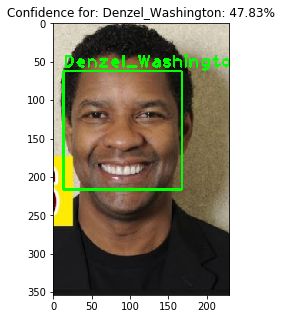

Prediction complete


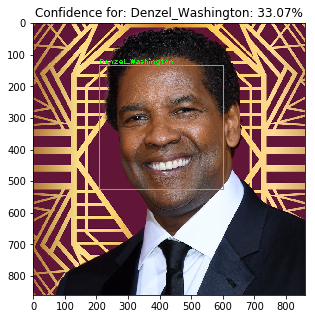

Prediction complete


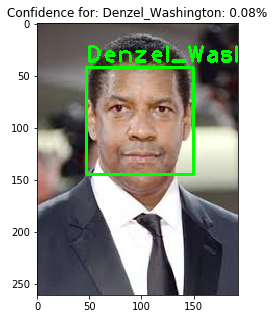

Prediction complete


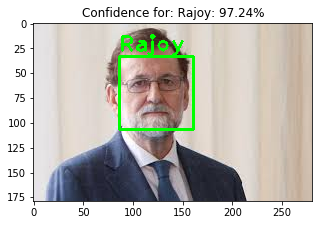

Prediction complete


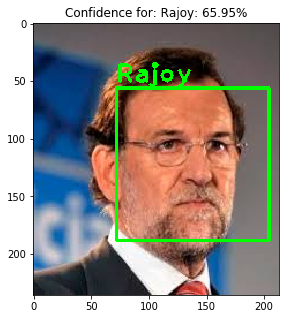

Prediction complete


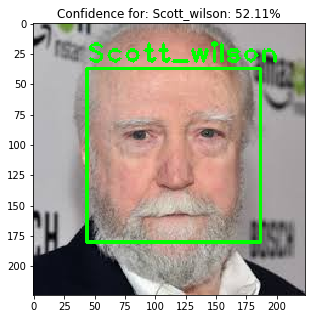

Prediction complete


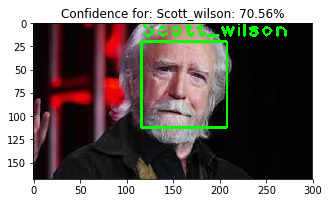

Prediction complete


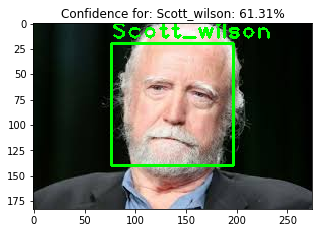

Prediction complete


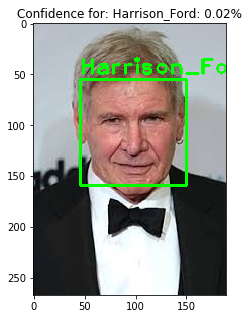

Prediction complete


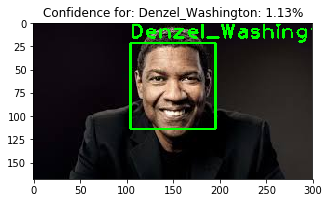

Prediction complete


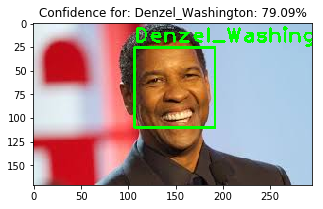

Prediction complete


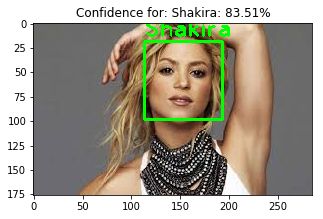

Prediction complete


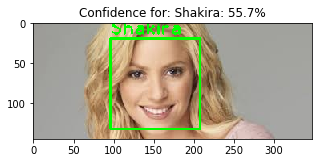

Prediction complete


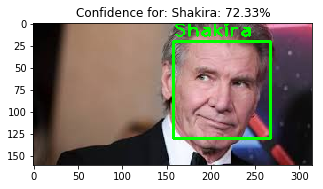

Prediction complete


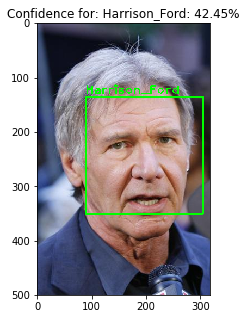

Prediction complete


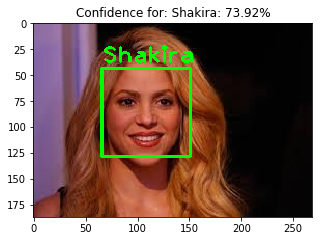

Prediction complete


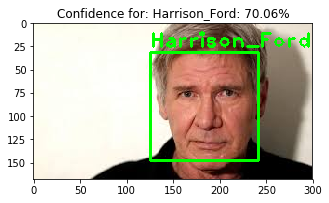

Prediction complete


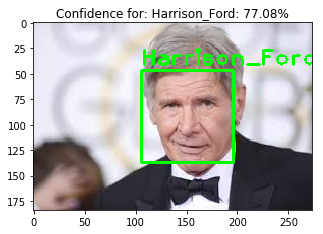

Prediction complete


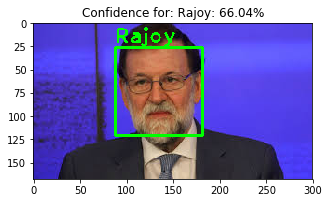

Prediction complete


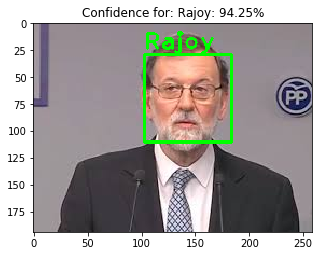

Prediction complete


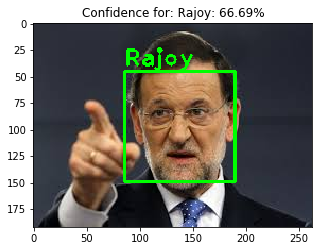

Prediction complete


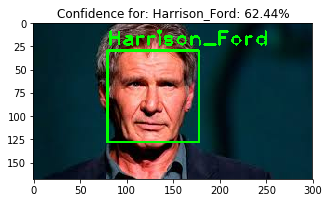

Prediction complete


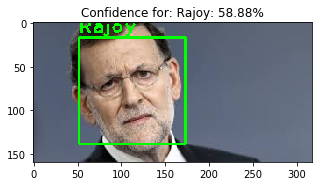

Prediction complete


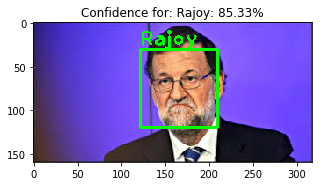

Prediction complete


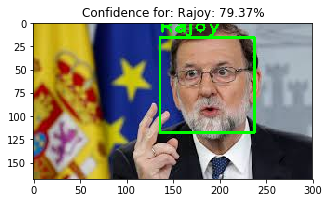

Prediction complete


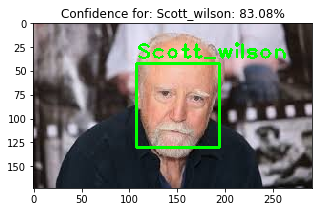

Prediction complete


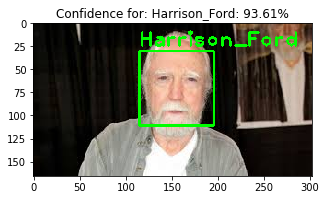

Prediction complete


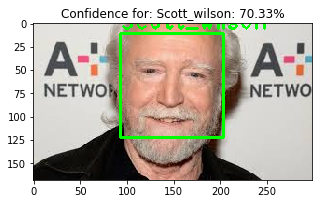

Prediction complete


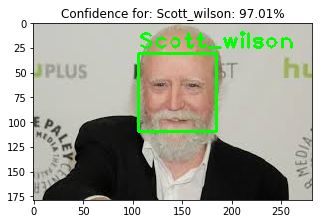

Prediction complete


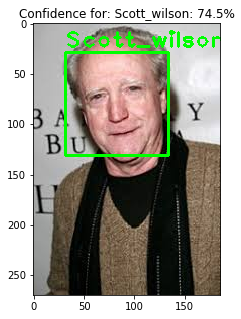

Prediction complete


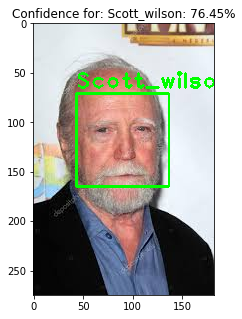

Prediction complete


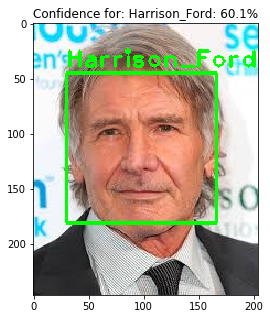

Prediction complete


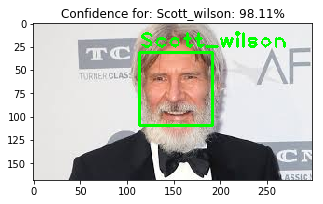

Prediction complete


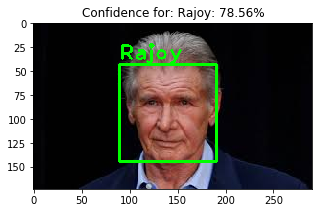

Prediction complete


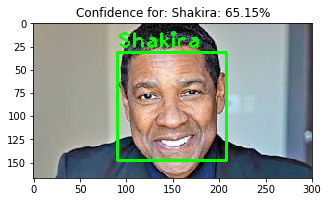

Prediction complete


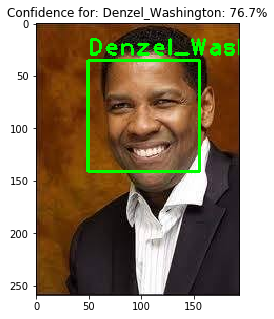

Prediction complete


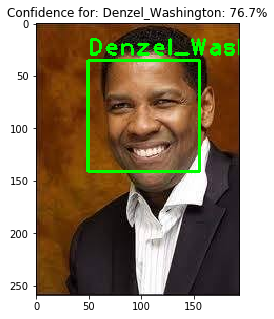

Prediction complete


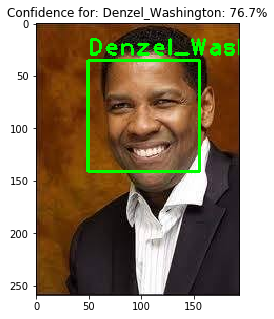

Prediction complete


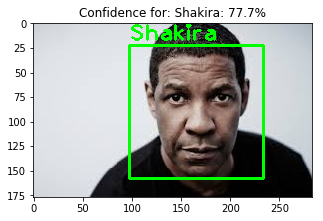

Prediction complete


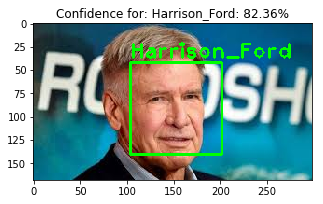

Prediction complete


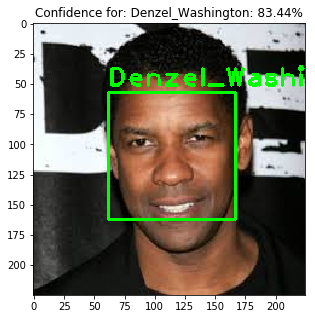

Prediction complete


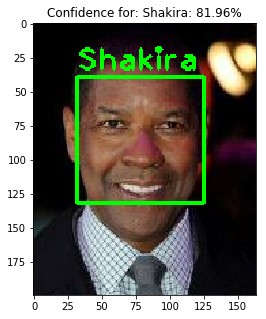

Prediction complete


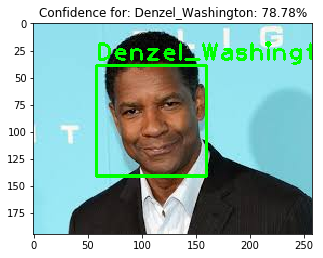

Prediction complete


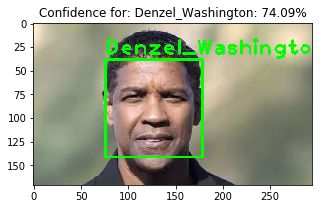

Prediction complete


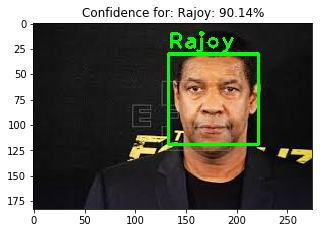

Prediction complete


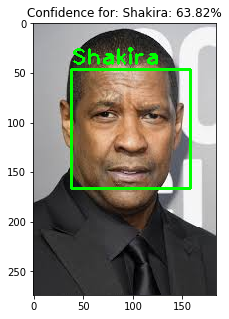

Prediction complete


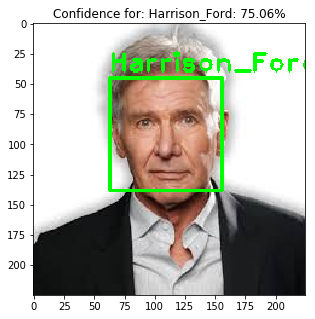

Prediction complete


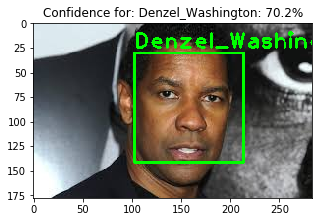

Prediction complete


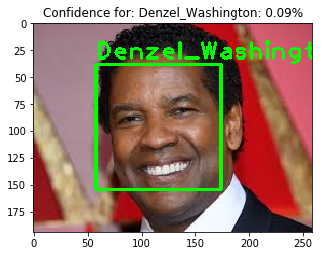

Prediction complete


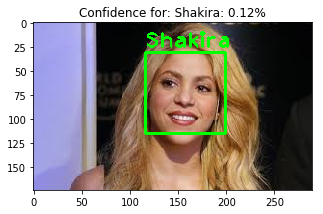

Prediction complete


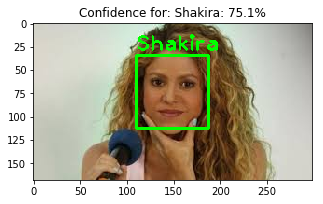

Prediction complete


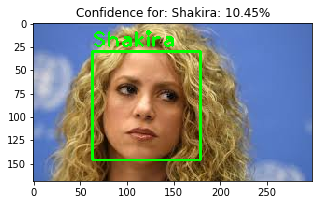

Prediction complete


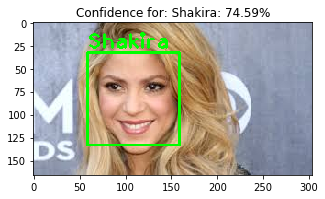

Prediction complete


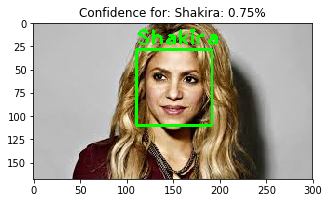

Prediction complete


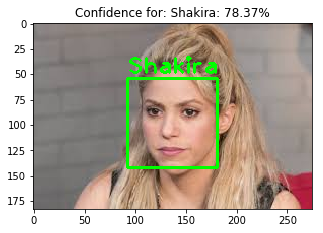

Prediction complete


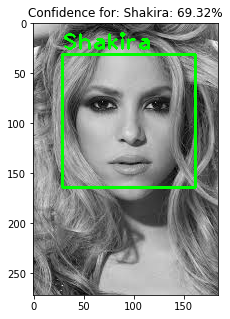

Prediction complete


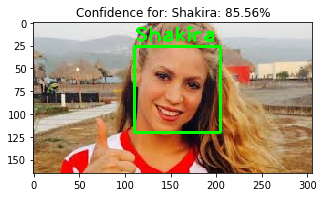

Prediction complete


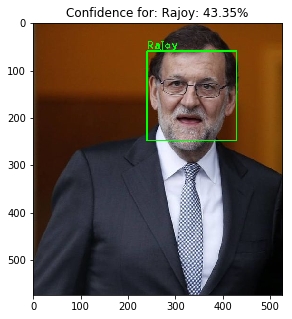

Prediction complete


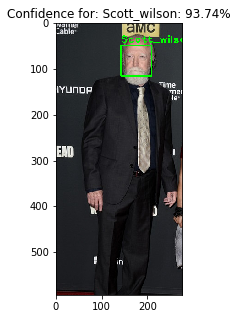

Prediction complete


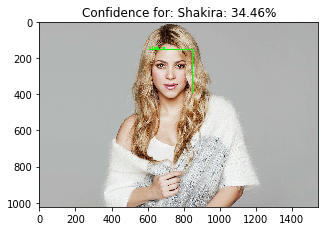

In [5]:
print("Predicting images...")
 
image_paths = glob.glob("Images\\people_detection_test\\*")

for img_path in image_paths:
    
    img = cv2.imread(img_path)
    face, rect = utl.detect_face(img_path)
    
    if face is not None:
        #predict the image using our face recognizer 
        label, conf = lbp_face_recognizer.predict(face)
        #get name of respective label returned by face recognizer
        label_text = identities[label]
        #draw a rectangle around face detected
        draw_rectangle(img, rect)
        #draw name of predicted person
        draw_text(img, label_text, rect[0], rect[1]-5)
    
        print("Prediction complete")
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        title = "Confidence for: " + label_text + ": "+ str(round(conf,2)) + "%"
        plt.title(title)
        plt.show()
    else:
        print("Face not detected for image: ", img_path)